# About the Project:

One of the interesting aspects about blood is that it is not a typical commodity. 
First, there is the perishable nature of blood. Grocery stores face the dilemma of perishable products such as milk, which can be challenging to predict accurately so as to not lose sales due to expiration. 
Blood has a shelf life of approximately 42 days according to the American Red Cross (Darwiche, Feuilloy et al. 2010). However, what makes this problem more challenging than milk is the stochastic behavior of blood supply to the system as compared to the more deterministic nature of milk supply. 
Whole blood is often split into platelets, red blood cells, and plasma, each having their own storage requirements and shelf life. 
For example, platelets must be stored around 22 degrees Celsius, while red blood cells 4 degree Celsius, and plasma at -25 degrees Celsius.
Moreover, platelets can often be stored for at most 5 days, red blood cells up to 42 days, and plasma up to a calendar year.

Amazingly, only around 5% of the eligible donor population actually donate (Linden, Gregorio et al. 1988, Katsaliaki 2008). 
This low percentage highlights the risk humans are faced with today as blood and blood products are forecasted to increase year-on-year. This is likely why so many researchers continue to try to understand the social and behavioral drivers for why people donate to begin with. 
The primary way to satisfy demand is to have regularly occurring donations from healthy volunteers.

# Aim Of Project:
To build a model which can identify who is likely to donate blood again.

In [60]:
# importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df_train = pd.read_csv('blood-train.csv')
df_test = pd.read_csv('blood-test.csv')

In [62]:
df_train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [63]:
df_test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [64]:
df_train.dtypes

Unnamed: 0                     int64
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

In [65]:
df_train.shape,df_test.shape

((576, 6), (200, 5))

In [66]:
df_train.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [67]:
df_test.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [68]:
#Counting the number of people who donated and not donated
df_train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

0 indicates not donated and
1 indicates donated

In [69]:
df_train.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [70]:
df_test.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [71]:
df_train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<AxesSubplot:ylabel='Months since Last Donation'>

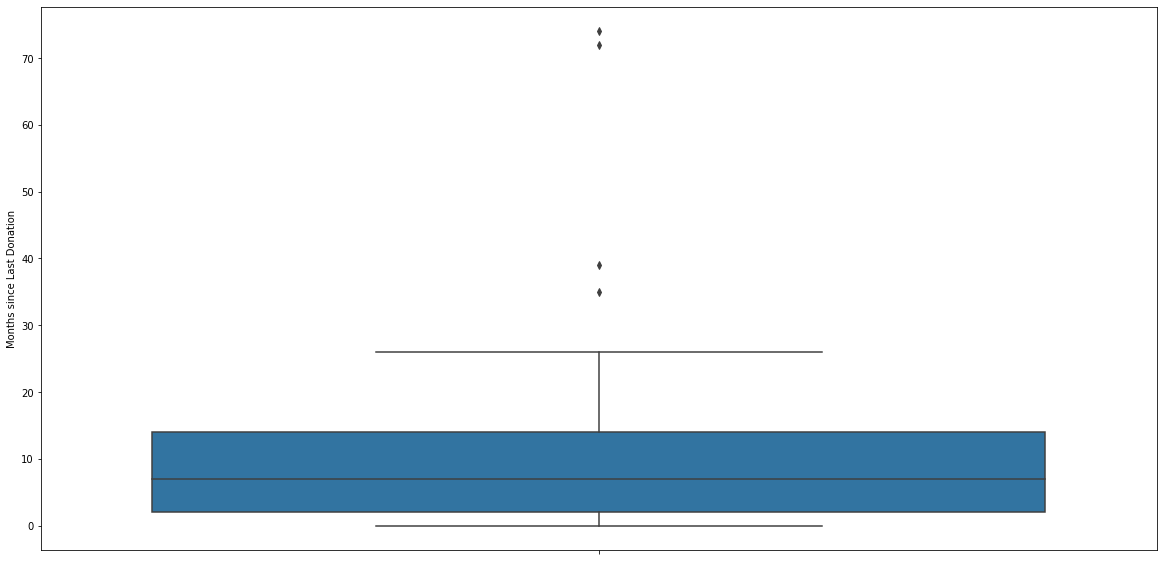

In [72]:
#Boxplot for Months since Last Donation
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=df_train)

Most of the people have donated blood in 10 months

<AxesSubplot:>

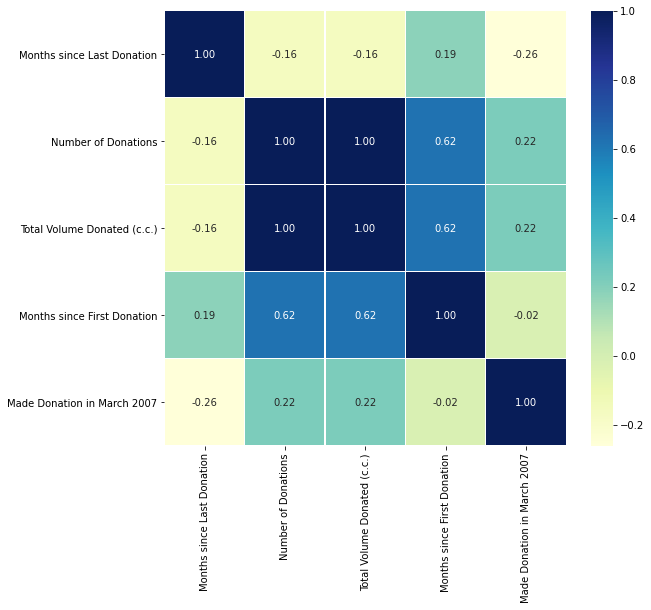

In [73]:
#Correlation between all variables [Checking how different variable are related]
corrmat=df_train.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [74]:
#Dropping the unnecessary column
df_train.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [75]:
#Printing all unique value for Month Since Last donation
df_train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

In [76]:
#Creating new variable for calculating how many times a person have donated
df_train["Donating for"] = (df_train["Months since First Donation"] - df_train["Months since Last Donation"])

In [77]:
df_train.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Donating for
0,2,50,98,1,96
1,0,13,28,1,28
2,1,16,35,1,34
3,2,20,45,1,43
4,1,24,77,0,76


In [87]:
df_train = df_train[['Months since Last Donation','Number of Donations','Months since First Donation',
                    'Donating for','Made Donation in March 2007']]

In [88]:
df_train.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for,Made Donation in March 2007
0,2,50,98,96,1
1,0,13,28,28,1
2,1,16,35,34,1
3,2,20,45,43,1
4,1,24,77,76,0


In [89]:
X = df_train.iloc[:,:-1]
Y = df_train.iloc[:,-1]

In [90]:
X.shape,Y.shape

((576, 4), (576,))

In [91]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Fitting and transforming data
X=scaler.fit_transform(X)

In [92]:
## train-test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [93]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[77 12]
 [21  6]]

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.87      0.82        89
           1       0.33      0.22      0.27        27

    accuracy                           0.72       116
   macro avg       0.56      0.54      0.55       116
weighted avg       0.68      0.72      0.69       116

Accuracy of the model:  0.7155172413793104


In [95]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[82  7]
 [23  4]]

Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.92      0.85        89
           1       0.36      0.15      0.21        27

    accuracy                           0.74       116
   macro avg       0.57      0.53      0.53       116
weighted avg       0.68      0.74      0.70       116

Accuracy of the model:  0.7413793103448276


In [98]:
##handling imbalanced dataset
df_train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [99]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_train[df_train['Made Donation in March 2007']==0]
df_minority = df_train[df_train['Made Donation in March 2007']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,  ## on data we have to sample         
                                replace=True, # sample with replacement reandomly 
                                n_samples=438, # to match majority class       
                                random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['Made Donation in March 2007'].value_counts()

1    438
0    438
Name: Made Donation in March 2007, dtype: int64

In [100]:
X = df_upsampled.values[:,:-1]
Y = df_upsampled.values[:,-1]

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [102]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=10)

In [103]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [104]:

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 91  43]
 [ 15 114]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       134
           1       0.73      0.88      0.80       129

    accuracy                           0.78       263
   macro avg       0.79      0.78      0.78       263
weighted avg       0.79      0.78      0.78       263

Accuracy of the model:  0.779467680608365


In [105]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 92  42]
 [ 11 118]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       134
           1       0.74      0.91      0.82       129

    accuracy                           0.80       263
   macro avg       0.82      0.80      0.80       263
weighted avg       0.82      0.80      0.80       263

Accuracy of the model:  0.7984790874524715


In [107]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=100, early_stopping=True,n_iter_no_change=5,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.71229714
Validation score: 0.677419
Iteration 2, loss = 0.63249736
Validation score: 0.612903
Iteration 3, loss = 0.60900429
Validation score: 0.612903
Iteration 4, loss = 0.60102310
Validation score: 0.580645
Iteration 5, loss = 0.59391824
Validation score: 0.580645
Iteration 6, loss = 0.58965946
Validation score: 0.580645
Iteration 7, loss = 0.58405972
Validation score: 0.564516
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[88 46]
 [44 85]]

Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       134
           1       0.65      0.66      0.65       129

    accuracy                           0.66       263
   macro avg       0.66      0.66      0.66       263
weighted avg       0.66      0.66      0.66       263

Accuracy of the model:  0.6577946768060836


In [109]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[82 52]
 [37 92]]

Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       134
           1       0.64      0.71      0.67       129

    accuracy                           0.66       263
   macro avg       0.66      0.66      0.66       263
weighted avg       0.66      0.66      0.66       263

Accuracy of the model:  0.6615969581749049


In [111]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 96  38]
 [ 15 114]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       134
           1       0.75      0.88      0.81       129

    accuracy                           0.80       263
   macro avg       0.81      0.80      0.80       263
weighted avg       0.81      0.80      0.80       263

Accuracy of the model:  0.7984790874524715


In [128]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=150,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 87  47]
 [ 27 102]]

Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       134
           1       0.68      0.79      0.73       129

    accuracy                           0.72       263
   macro avg       0.72      0.72      0.72       263
weighted avg       0.72      0.72      0.72       263

Accuracy of the model:  0.7186311787072244


In [132]:
from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 95  39]
 [ 12 117]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       134
           1       0.75      0.91      0.82       129

    accuracy                           0.81       263
   macro avg       0.82      0.81      0.80       263
weighted avg       0.82      0.81      0.80       263

Accuracy of the model:  0.8060836501901141


In [141]:
model_GradientBoosting=XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [142]:
#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 94  40]
 [ 12 117]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       134
           1       0.75      0.91      0.82       129

    accuracy                           0.80       263
   macro avg       0.82      0.80      0.80       263
weighted avg       0.82      0.80      0.80       263

Accuracy of the model:  0.8022813688212928


In [134]:
df_test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34


In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_test)

X_test_new = scaler.transform(df_test)

In [136]:
Y_pred = model_GradientBoosting.predict(X_test_new)

In [137]:
df_test['Y_predictions'] = Y_pred
df_test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Y_predictions
0,2,12,3000,52,0
1,21,7,1750,38,1
2,4,1,250,4,0
3,11,11,2750,38,0
4,4,12,3000,34,1


In [138]:
df_test.Y_predictions=df_test.Y_predictions.map({1:"Donated",0:"Not Donated"})
df_test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Y_predictions
0,2,12,3000,52,Not Donated
1,21,7,1750,38,Donated
2,4,1,250,4,Not Donated
3,11,11,2750,38,Not Donated
4,4,12,3000,34,Donated


In [139]:
df_test.to_csv('Donation_anlysis_report.csv')

In [140]:
df_test.Y_predictions.value_counts()

Not Donated    152
Donated         48
Name: Y_predictions, dtype: int64

By trying out various models Xgboost is giving good accuracy where only 48 have donated and 158 have not donated in March 2007.